<a href="https://colab.research.google.com/github/valmirf/mineracao_textual/blob/main/Classifica%C3%A7%C3%A3o/03a_Classifica%C3%A7%C3%A3oTextos_BoW_TF_IDF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Aprendizado Bayesiano: Naive Bayes

O algoritmo Naive Bayes, assim como o KNN é um algoritmo de aprendizado com implementação relativamente simples, e que pode levar a resultados muito bons em determinados problemas de classificação. Este consiste em aplicar o teorema de Bayes, com a prerrogativa de independencia condicional entre cada par de atributos dado o valor da classe.

Clique nos links para mais informações sobre o algoritmo [Naive Bayes](https://scikit-learn.org/stable/modules/naive_bayes.html#naive-bayes) e sobre [classificação de textos](https://scikit-learn.org/stable/tutorial/text_analytics/working_with_text_data.html). com scikit-learn.

# Exemplo: classificação de texto

Neste exemplo, utilizaremos um dataset chamado 20newsgroups. 

O conjunto de dados é uma coleção de aproximadamente 20.000 documentos de grupos de notícias, particionados (quase) uniformemente em 20 grupos/categorias de notícias diferentes. Mais informações sobre esta base podem ser obtidas no repositório [UCI](http://archive.ics.uci.edu/ml/datasets/Twenty+Newsgroups)

As categorias existentes são:

* 'alt.atheism',
* 'comp.graphics',
* 'comp.os.ms-windows.misc',
* 'comp.sys.ibm.pc.hardware',
* 'comp.sys.mac.hardware',
* 'comp.windows.x',
* 'misc.forsale',
* 'rec.autos',
* 'rec.motorcycles',
* 'rec.sport.baseball',
* 'rec.sport.hockey',
* 'sci.crypt',
* 'sci.electronics',
* 'sci.med',
* 'sci.space',
* 'soc.religion.christian',
* 'talk.politics.guns',
* 'talk.politics.mideast',
* 'talk.politics.misc',
* 'talk.religion.misc'

Neste exemplo, vamos considerar apenas duas categorias: '**alt.med**' e '**comp.graphics**'. O scitkit contém uma função que auxilia o download desta base:

In [1]:
from sklearn.datasets import fetch_20newsgroups

# Categorias selecionadas
categories = [
    'comp.graphics',
    'sci.med',
]

print("Carregando 20 newsgroups dataset para as categorias:")
print(categories)

twenty_train = fetch_20newsgroups(subset='train', categories=categories, shuffle=True, random_state=42)
twenty_test  = fetch_20newsgroups(subset='test',  categories=categories, shuffle=True, random_state=42)
print("%d documents" % len(twenty_train.filenames))
print("%d categories" % len(twenty_train.target_names))

Carregando 20 newsgroups dataset para as categorias:
['comp.graphics', 'sci.med']
1178 documents
2 categories


In [2]:
# Visualizar os dados coletados
print(twenty_train.keys())

dict_keys(['data', 'filenames', 'target_names', 'target', 'DESCR'])


In [3]:
# Visualizando um dos documentos
print(twenty_train['data'][0])

From: zyeh@caspian.usc.edu (zhenghao yeh)
Subject: Re: Need polygon splitting algo...
Organization: University of Southern California, Los Angeles, CA
Lines: 25
Distribution: world
NNTP-Posting-Host: caspian.usc.edu
Keywords: polygons, splitting, clipping


In article <1qvq4b$r4t@wampyr.cc.uow.edu.au>, g9134255@wampyr.cc.uow.edu.au (Coronado Emmanuel Abad) writes:
|> 
|> The idea is to clip one polygon using another polygon (not
|> necessarily rectangular) as a window.  My problem then is in
|> finding out all the new vertices of the resulting "subpolygons"
|> from the first one.  Is this simply a matter of extending the
|> usual algorithm whereby each of the edges of one polygon is checked
|> against another polygon???  Is there a simpler way??
|> 
|> Comments welcome.
|> 
|> Noel.

	It depends on what kind of the polygons. 
	Convex - simple, concave - trouble, concave with loop(s)
	inside - big trouble.

	Of cause, you can use the box test to avoid checking
	each edges. According to 

In [5]:
# tamanho (sem preprocessamento)
len(twenty_train['data'][0])

1150

## Preprocessamento

Como etapa de préprocessamento, iremos apenas nos limitar a remover palavras muito comuns, as chamadas *stopwords*. Uma lista de possíveis stopwords para inglês encontra-se abaixo:

In [6]:
stopwords = ['a', 'about', 'above', 'after', 'again', 'against', 'all', 'am', 'an', 'and', 'any', 'are', "aren't", 'as', 'at',
             'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by',  'can', "can't", 'cannot', 'could', "couldn't", 
             'did', "didn't", 'do', 'does', "doesn't", 'doing', "don't", 'down', 'during','each', 'few', 'for', 'from', 'further', 
             'had', "hadn't", 'has', "hasn't", 'have', "haven't", 'having', 'he', "he'd", "he'll", "he's", 'her', 'here', "here's",
             'hers', 'herself', 'him', 'himself', 'his', 'how', "how's",'i', "i'd", "i'll", "i'm", "i've", 'if', 'in', 'into', 'is', "isn't", 
             'it', "it's", 'its', 'itself','1st', '2nd', '3rd','4th', '5th', '6th', '7th', '8th', '9th', '10th'
             "let's", 'me', 'more', 'most', "mustn't", 'my', 'myself','no', 'nor', 'not', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'ought', 'our', 'ours' 'ourselves', 'out', 'over', 'own',
             'same', "shan't", 'she', "she'd", "she'll", "she's", 'should', "shouldn't", 'so', 'some', 'such', 
             'than', 'that',"that's", 'the', 'their', 'theirs', 'them', 'themselves', 'then', 'there', "there's", 'these', 'they', "they'd", 
             "they'll", "they're", "they've", 'this', 'those', 'through', 'to', 'too', 'under', 'until', 'up', 'very', 
             'was', "wasn't", 'we', "we'd", "we'll", "we're", "we've", 'were', "weren't", 'what', "what's", 'when', "when's", 'where',
             "where's", 'which', 'while', 'who', "who's", 'whom', 'why', "why's",'will', 'with', "won't", 'would', "wouldn't", 
             'you', "you'd", "you'll", "you're", "you've", 'your', 'yours', 'yourself', 'yourselves', 
             'one', 'two', 'three', 'four', 'five', 'six', 'seven', 'eight', 'nine', 'ten', 'hundred', 'thousand']

O código abaixo utiliza a biblioteca NLTK para fazer o pré-processamento dos textos:

In [7]:
import string
from nltk.tokenize.regexp import RegexpTokenizer

def preprocess(text):
  
  # remover pontuações
  text   = text.translate(string.punctuation)
  
  # converter para lowercase
  text = text.lower()
  
  # tokenizar o texto em palavras
  tokenizer = RegexpTokenizer(r'\w+')
  tokens = tokenizer.tokenize(text.lower())

  # filtrar palavras
  tokens = [word for word in tokens
            if word not in stopwords       # descartar stopwords
                and len(word) > 3          # descartar palavras com menos de 3 caracteres
                and not word[0].isdigit()] # descartar tokens contendo apenas numeros

  return ' '.join(tokens)

X_train = []
for doc in twenty_train['data']:
  X_train.append(preprocess(doc))
  
X_test = []
for doc in twenty_test['data']:
  X_test.append(preprocess(doc))
  
print(X_train[0])

zyeh caspian zhenghao subject need polygon splitting algo organization university southern california angeles lines distribution world nntp posting host caspian keywords polygons splitting clipping article wampyr g9134255 wampyr coronado emmanuel abad writes idea clip polygon using another polygon necessarily rectangular window problem finding vertices resulting subpolygons first simply matter extending usual algorithm whereby edges polygon checked another polygon simpler comments welcome noel depends kind polygons convex simple concave trouble concave loop inside trouble cause test avoid checking edges according experience simple headache stuff deal special cases example overlapped lines


In [8]:
# tamanho (com preprocessamento)
len(X_train[0])

697

### Exercício

Converter o a função de preprocessamento acima para utilizar o SpaCy

In [ ]:
# sua resposta

## Representação vetorial do texto

Neste exemplo, utilizaremos o algoritmo Naive Bayes para classificar documentos de texto em categorias. Para isso, precisamos antes converter o texto para uma representação vetorial, ou seja, cada documento/exemplo precisa ser representado por um vetor de dimensões pré-definidas. Utilizaremos três técnicas básicas: BOW (*Bag of Words*), TF (*Term Frequency*) e TF-IDF (*Term Frequency - Inverse Document Frequency*)

### BOW

Consiste basicamente em contar quantas vezes cada palavra aparece no documento. Ou seja, sua aplicação a um conjunto de *n* documentos, produz uma matriz *n x d*, onde *d* corresponde ao tamanho do vocabulário considerado. No Scikit, esta representação é implementada pelo [CountVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html#sklearn.feature_extraction.text.CountVectorizer):

In [10]:
# Exemplo de uso do BOW no scikit

from sklearn.feature_extraction.text import CountVectorizer
corpus = [
    'This is the first document.',
    'This document is the second document.',
    'And this is the third one.',
    'Is this the first document?',
]
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(corpus)
#print(vectorizer.get_feature_names())
print(X.toarray())  

[[0 1 1 1 0 0 1 0 1]
 [0 2 0 1 0 1 1 0 1]
 [1 0 0 1 1 0 1 1 1]
 [0 1 1 1 0 0 1 0 1]]


Aplicando ao nosso dataset:

In [11]:
vectorizer = CountVectorizer()
bow_model  = vectorizer.fit(X_train)

X_bow_train = bow_model.transform(X_train)
X_bow_test  = bow_model.transform(X_test)

print(X_bow_train.shape,X_bow_test.shape)

(1178, 19924) (785, 19924)


In [18]:
# matriz está armazenada em formato sparse
print(X_bow_train[0,:])

  (0, 171)	1
  (0, 273)	1
  (0, 678)	1
  (0, 681)	1
  (0, 906)	1
  (0, 959)	2
  (0, 1204)	1
  (0, 1448)	1
  (0, 2555)	1
  (0, 2725)	1
  (0, 2728)	2
  (0, 2754)	1
  (0, 2956)	1
  (0, 2958)	1
  (0, 3251)	1
  (0, 3256)	1
  (0, 3463)	1
  (0, 3643)	2
  (0, 3919)	1
  (0, 3998)	1
  (0, 4513)	1
  (0, 4731)	1
  (0, 5176)	1
  (0, 5584)	2
  (0, 5762)	1
  :	:
  (0, 14577)	1
  (0, 15012)	1
  (0, 16149)	2
  (0, 16150)	1
  (0, 16157)	1
  (0, 16487)	1
  (0, 16532)	1
  (0, 16631)	2
  (0, 17018)	1
  (0, 17043)	1
  (0, 17059)	1
  (0, 17716)	1
  (0, 18251)	2
  (0, 18599)	1
  (0, 18748)	1
  (0, 18752)	1
  (0, 18968)	1
  (0, 19232)	2
  (0, 19367)	1
  (0, 19418)	1
  (0, 19499)	1
  (0, 19623)	1
  (0, 19669)	1
  (0, 19890)	1
  (0, 19921)	1


### *Term Frequency* (TF)
A contagem de ocorrências (i.e., BOW) é um bom começo, mas há um problema: documentos mais longos terão valores de contagem média mais altos do que documentos mais curtos, embora possam falar sobre os mesmos tópicos.

Para evitar essas possíveis discrepâncias, basta dividir o número de ocorrências de cada palavra em um documento pelo número total de palavras no documento:

In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(use_idf=False)
tf_model = vectorizer.fit(X_train)

X_tf_train = tf_model.transform(X_train)
X_tf_test  = tf_model.transform(X_test)

print(X_tf_train[0,:])

  (0, 171)	0.08804509063256238
  (0, 273)	0.08804509063256238
  (0, 678)	0.08804509063256238
  (0, 681)	0.08804509063256238
  (0, 906)	0.08804509063256238
  (0, 959)	0.17609018126512477
  (0, 1204)	0.08804509063256238
  (0, 1448)	0.08804509063256238
  (0, 2555)	0.08804509063256238
  (0, 2725)	0.08804509063256238
  (0, 2728)	0.17609018126512477
  (0, 2754)	0.08804509063256238
  (0, 2956)	0.08804509063256238
  (0, 2958)	0.08804509063256238
  (0, 3251)	0.08804509063256238
  (0, 3256)	0.08804509063256238
  (0, 3463)	0.08804509063256238
  (0, 3643)	0.17609018126512477
  (0, 3919)	0.08804509063256238
  (0, 3998)	0.08804509063256238
  (0, 4513)	0.08804509063256238
  (0, 4731)	0.08804509063256238
  (0, 5176)	0.08804509063256238
  (0, 5584)	0.17609018126512477
  (0, 5762)	0.08804509063256238
  :	:
  (0, 14577)	0.08804509063256238
  (0, 15012)	0.08804509063256238
  (0, 16149)	0.17609018126512477
  (0, 16150)	0.08804509063256238
  (0, 16157)	0.08804509063256238
  (0, 16487)	0.08804509063256238
  

### TF-IDF
Palavras que aparecem em muitos documentos podem não ser interessantes para diferencia a classe desses documentos. Portanto, podemos dar um peso maior as palavras que aparecem em poucos documentos, pois essas palavras funcionam melhor para diferenciar as classes entre os documentos. TF-IDF é uma indicação do poder de discriminação do termo. O Log é usado para diminuir o efeito em relação a tf.

Usando o scikit, basta ativar o flag `use_idf=True`:

In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(use_idf=True)
tfidf_model = vectorizer.fit(X_train)

X_tfidf_train = tfidf_model.transform(X_train)
X_tfidf_test  = tfidf_model.transform(X_test)

print(X_tfidf_train[0,:])

  (0, 19921)	0.10383939382532555
  (0, 19890)	0.10383939382532555
  (0, 19669)	0.032622129876398155
  (0, 19623)	0.049784186588151064
  (0, 19499)	0.08318936336659238
  (0, 19418)	0.11493120439343397
  (0, 19367)	0.09587341399898087
  (0, 19232)	0.22986240878686795
  (0, 18968)	0.10224715376104548
  (0, 18752)	0.08674226639616602
  (0, 18748)	0.057554115504060505
  (0, 18599)	0.03552235596093959
  (0, 18251)	0.16637872673318477
  (0, 17716)	0.07373432736258789
  (0, 17059)	0.12761525502582247
  (0, 17043)	0.018299216945731396
  (0, 17018)	0.07219567215927884
  (0, 16631)	0.2365350922301801
  (0, 16532)	0.07847129256054856
  (0, 16487)	0.0994263170285545
  (0, 16157)	0.07889198274202017
  (0, 16150)	0.10751151041623824
  (0, 16149)	0.1438057568835491
  (0, 15012)	0.09034191074603323
  (0, 14577)	0.10383939382532555
  :	:
  (0, 5762)	0.11493120439343397
  (0, 5584)	0.18767614394434426
  (0, 5176)	0.04812701724127763
  (0, 4731)	0.09482745978384977
  (0, 4513)	0.08115402133978364
  (0, 39

# Treinando modelo NaiveBayes (NB)

In [21]:
from sklearn.naive_bayes import MultinomialNB

clf = MultinomialNB()

## BOW + NB

In [22]:
clf.fit(X_bow_train, twenty_train.target)

acc = clf.score(X_bow_test , twenty_test.target)
print('Acurácia: ', acc)

Acurácia:  0.9694267515923567


## TF + NB

In [23]:
clf.fit(X_tf_train, twenty_train.target)

acc = clf.score(X_tf_test , twenty_test.target)
print('Acurácia: ', acc)

Acurácia:  0.9477707006369427


## TF-IDF + NB

In [24]:
clf.fit(X_tfidf_train, twenty_train.target)

acc = clf.score(X_tfidf_test , twenty_test.target)
print('Acurácia: ', acc)

Acurácia:  0.9579617834394905


# Testando iterativamente

In [25]:
docs = ['The patient is getting well', 'OpenGL on the GPU is fast']
preprocessed_docs = [preprocess(doc) for doc in docs]

print('\nafter preprocessing:')
print(preprocessed_docs)

docs_preds = clf.predict(tfidf_model.transform(preprocessed_docs))

print('\npredictions:')
for i,doc in enumerate(docs):
    print('{} -> {}'.format(doc, twenty_train.target_names[docs_preds[i]]))
    


after preprocessing:
['patient getting well', 'opengl fast']

predictions:
The patient is getting well -> sci.med
OpenGL on the GPU is fast -> comp.graphics


## Classification Report

               precision    recall  f1-score   support

comp.graphics       0.96      0.96      0.96       389
      sci.med       0.96      0.96      0.96       396

     accuracy                           0.96       785
    macro avg       0.96      0.96      0.96       785
 weighted avg       0.96      0.96      0.96       785

Matriz de Confusao:


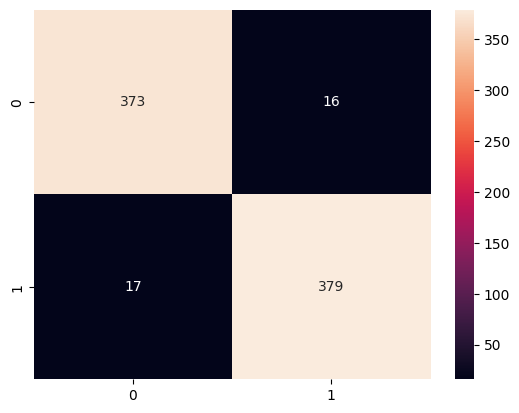

In [42]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns

preds = clf.predict(X_tfidf_test)


#print(metrics.plot_confusion_matrix(clf, X_tfidf_test, twenty_test.target, 
#                                    display_labels=twenty_test.target_names,
#                                    normalize='true'))


print(metrics.classification_report(twenty_test.target, preds,
                                    target_names=twenty_test.target_names))


print('Matriz de Confusao:')
cm = confusion_matrix(twenty_test.target,preds)
f = sns.heatmap(cm, annot=True, fmt='d')
